In [44]:
# import needed libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# read the hotel reservation data in

dataset = pd.read_csv('booking.csv')

### Clean dataset

Drop Booking_ID variable

In [46]:
# drop the booking_id variable - doesn't offer any valuable insight
dataset = dataset.drop('Booking_ID', axis=1)

# view to make sure that the variable has been dropped
print(dataset.shape)
dataset.head()

(36285, 16)


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


Check for missing/null values in the dataset

In [47]:
# sum up the null values for each variable in the dataset
null_vals = dataset.isnull().sum()
# view total number of null values for each variable
null_vals

,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0
repeated,0


Encode categorical variables with numerical values

In [48]:
# determine data type of each variable
data_types = dataset.dtypes

data_types

,0
number of adults,int64
number of children,int64
number of weekend nights,int64
number of week nights,int64
type of meal,object
car parking space,int64
room type,object
lead time,int64
market segment type,object
repeated,int64


In [49]:
# view unique values of categorical variables in dataset
# categorical variables include: type of meal, room type, market segment type, booking status
print("Unique values for type of meal:", dataset['type of meal'].unique())

print("Unique values for room type:", dataset['room type'].unique())

print("Unique values for market segment type:", dataset['market segment type'].unique())

print("Unique values for booking status:", dataset['booking status'].unique())

Unique values for type of meal: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Unique values for room type: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Unique values for market segment type: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
Unique values for booking status: ['Not_Canceled' 'Canceled']


In [50]:
# use a numerical coding method to encode the categorical variables
dataset['type of meal'] = dataset['type of meal'].replace({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3});
dataset['room type'] = dataset['room type'].replace({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5,
                                                     'Room_Type 6': 6, 'Room_Type 7': 7});
dataset['market segment type'] = dataset['market segment type'].replace({'Offline': 0, 'Online': 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4});
dataset['booking status'] = dataset['booking status'].replace({'Not_Canceled': 0, 'Canceled': 1});

# view dataset to make sure changes were successful
dataset

<ipython-input-50-60ee36f83120>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['type of meal'] = dataset['type of meal'].replace({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3});
<ipython-input-50-60ee36f83120>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['room type'] = dataset['room type'].replace({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5,
<ipython-input-50-60ee36f83120>:5: FutureWarning: Downcasting behavior in `replace` is deprecated

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,1,0,1,224,0,0,0,0,88.00,0,10/2/2015,0
1,1,0,1,3,0,0,1,5,1,0,0,0,106.68,1,11/6/2018,0
2,2,1,1,3,1,0,1,1,1,0,0,0,50.00,0,2/28/2018,1
3,1,0,0,2,1,0,1,211,1,0,0,0,100.00,1,5/20/2017,1
4,1,0,1,2,0,0,1,48,1,0,0,0,77.00,0,4/11/2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,2,0,1,346,1,0,0,0,115.00,1,9/13/2018,1
36281,2,0,1,3,1,0,1,34,1,0,0,0,107.55,1,10/15/2017,0
36282,2,0,1,3,1,0,4,83,1,0,0,0,105.61,1,12/26/2018,0
36283,3,0,0,4,1,0,1,121,0,0,0,0,96.90,1,7/6/2018,0


Split date into separate month/day/year variables

In [51]:
# drop any dates that are not in the correct format (at least one uses '-' instead of '/')
dataset = dataset[~dataset["date of reservation"].str.contains("-")]

# access date of registration variable and split based on '/' - make 3 new variables for month/day/year
dataset[["month of reservation", "day of reservation", "year of reservation"]] = dataset["date of reservation"].str.split("/", expand = True)

# convert the data types to int types
dataset['month of reservation'] = dataset['month of reservation'].astype(int)
dataset['day of reservation'] = dataset['day of reservation'].astype(int)
dataset['year of reservation'] = dataset['year of reservation'].astype(int)

# drop original date of reservation variable
dataset = dataset.drop('date of reservation', axis=1)

# view dataset to make sure changes were successful
dataset

<ipython-input-51-6e9d67a04f9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[["month of reservation", "day of reservation", "year of reservation"]] = dataset["date of reservation"].str.split("/", expand = True)
<ipython-input-51-6e9d67a04f9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[["month of reservation", "day of reservation", "year of reservation"]] = dataset["date of reservation"].str.split("/", expand = True)
<ipython-input-51-6e9d67a04f9d>:5: SettingWithCopyWarning: 
A valu

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month of reservation,day of reservation,year of reservation
0,1,1,2,5,1,0,1,224,0,0,0,0,88.00,0,0,10,2,2015
1,1,0,1,3,0,0,1,5,1,0,0,0,106.68,1,0,11,6,2018
2,2,1,1,3,1,0,1,1,1,0,0,0,50.00,0,1,2,28,2018
3,1,0,0,2,1,0,1,211,1,0,0,0,100.00,1,1,5,20,2017
4,1,0,1,2,0,0,1,48,1,0,0,0,77.00,0,1,4,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,2,0,1,346,1,0,0,0,115.00,1,1,9,13,2018
36281,2,0,1,3,1,0,1,34,1,0,0,0,107.55,1,0,10,15,2017
36282,2,0,1,3,1,0,4,83,1,0,0,0,105.61,1,0,12,26,2018
36283,3,0,0,4,1,0,1,121,0,0,0,0,96.90,1,0,7,6,2018


In [52]:
# look at data types one more time to ensure everything is a numerical type
data_types = dataset.dtypes

data_types

,0
number of adults,int64
number of children,int64
number of weekend nights,int64
number of week nights,int64
type of meal,int64
car parking space,int64
room type,int64
lead time,int64
market segment type,int64
repeated,int64


Check for outliers in the dataset - No longer using

In [53]:
# # use boxplot to visualize potential outliers
# # only visualize those that were numerical data types originally

# sns.boxplot(data=dataset[['number of adults', 'number of children', 'number of weekend nights', 'number of week nights',
#                           'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests']])
# plt.title("Boxplots to Show Outliers for Each Variable")
# plt.xlabel("Variables")
# plt.ylabel("Values")
# plt.xticks(rotation=45)
# plt.show()

# fig, axes = plt.subplots(1, 11, figsize=(20, 5))

# axes[0].hist(dataset['lead time'], bins=20, color='skyblue', edgecolor='black')

# axes[1].hist(dataset['average price'], bins=20, color='lightgreen', edgecolor='black')

In [54]:
# # look for outliers mathematically - can a create a function that will find and drop outliers based on IQR
# def find_and_drop_outliers_IQR(dataset, variable_list):

#   # loop through variable list
#   for variable in variable_list:
#     # get the variable column
#     variable_col = dataset[variable]
#     # find first quartile
#     Q1 = variable_col.quantile(0.25)
#     # find third quartile
#     Q3 = variable_col.quantile(0.75)
#     # compute interquartile range (IQR)
#     IQR = Q3 - Q1

#     # compute lower bound (anything below this value is an outlier)
#     lower_bound = Q1 - 1.5 * IQR
#     # compute upper bound (anything above this value is an outlier)
#     upper_bound = Q3 + 1.5 * IQR

#     # filter out rows where the column value is outside the bounds - so only keep what is in bounds
#     dataset = dataset[(variable_col >= lower_bound) & (variable_col <= upper_bound)]


#   return dataset

# # define variable list
# variable_list = ['lead time', 'average price']
# # call the function on each variable that we want to look for outliers
# data_clean = find_and_drop_outliers_IQR(dataset, variable_list)

# data_clean.shape


In [55]:
# # make a new plot to ensure that any outliers have been removed

# sns.boxplot(data=data_clean[['number of adults', 'number of children', 'number of weekend nights', 'number of week nights',
#                           'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests']])
# plt.title("Boxplots With Outliers Removed for Each Variable")
# plt.xlabel("Variables")
# plt.ylabel("Values")
# plt.xticks(rotation=45)
# plt.show()


# fig, axes = plt.subplots(1, 11, figsize=(20, 5))

# axes[0].hist(data_clean['lead time'], bins=20, color='skyblue', edgecolor='black')

# axes[1].hist(data_clean['average price'], bins=20, color='lightgreen', edgecolor='black')

In [56]:
# assign dataset to a variable called data_clean to avoid changing variable name throughout code
# due to decision not to remove outiers
data_clean = dataset

### Exploratory analysis of dataset

Check the counts for each class of the response variable (booking status)

In [57]:
print("Counts for each class of 'booking status':")
print(data_clean['booking status'].value_counts())

Counts for each class of 'booking status':
booking status
0    24366
1    11882
Name: count, dtype: int64


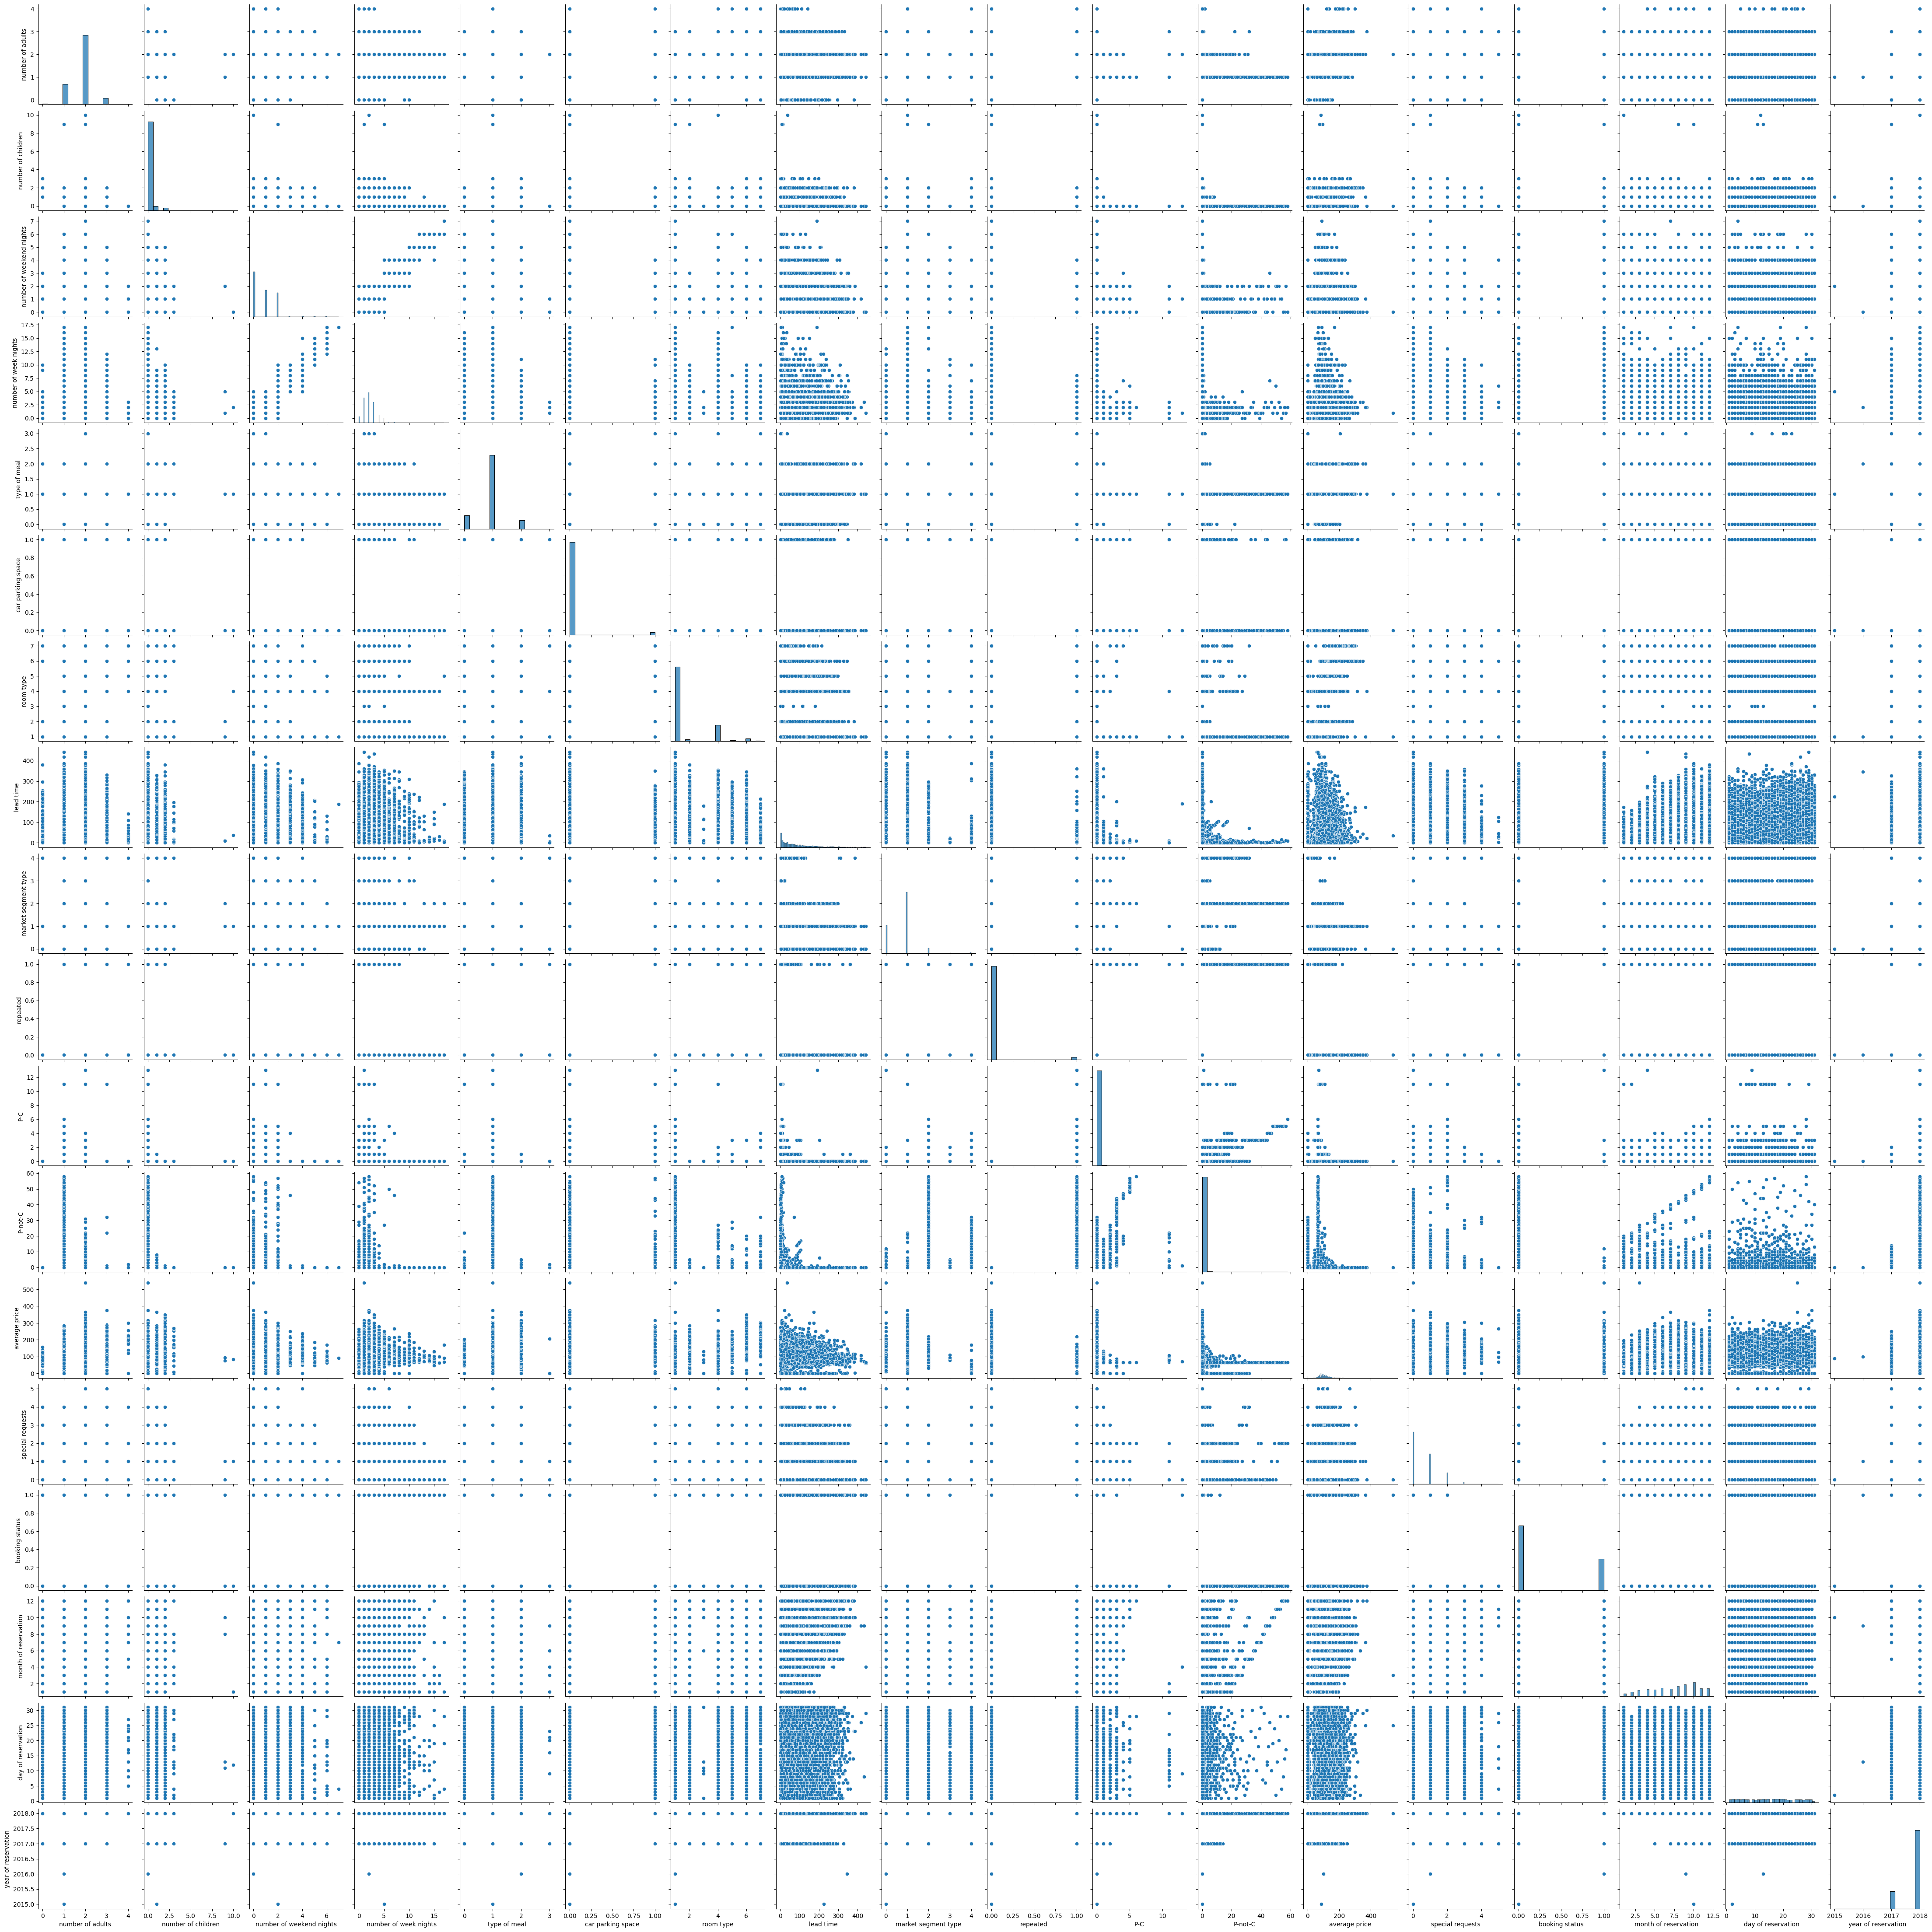

In [58]:
# show relationship between all variables

sns.pairplot(data_clean)
plt.show()

In [59]:
# create correlation matrix between all variables to look at relationships of variables with response variable (booking status)
correlation_matrix = data_clean.corr()

# extract correlation between variables and the response variable
correlation_booking_status = correlation_matrix['booking status']

# show correlations
correlation_booking_status

,booking status
number of adults,0.086525
number of children,0.032962
number of weekend nights,0.061630
number of week nights,0.092732
type of meal,0.049669
car parking space,-0.086047
room type,0.023203
lead time,0.438583
market segment type,-0.048619
repeated,-0.107479


Compare relationship between highest correlation predictors and response variable

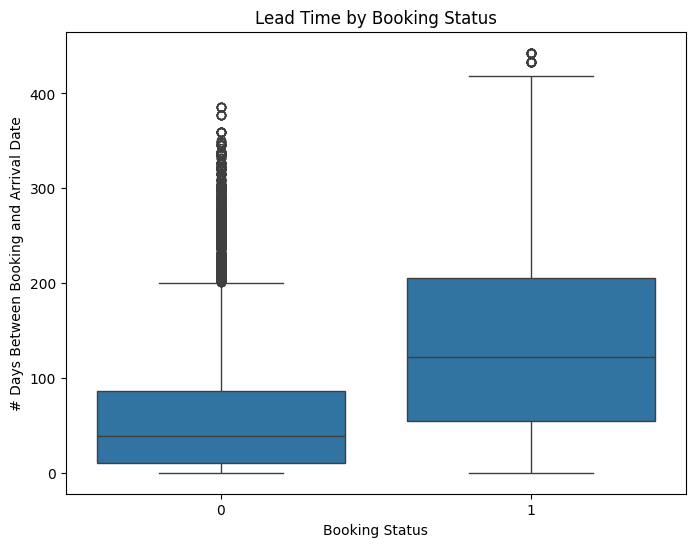

In [60]:
# create box plot for lead time and booking status (correlation coeff = 0.4106)
plt.figure(figsize=(8,6))
sns.boxplot(x = 'booking status', y = 'lead time', data = data_clean)

# add title
plt.title('Lead Time by Booking Status')
# add x and y labels
plt.xlabel('Booking Status')
plt.ylabel('# Days Between Booking and Arrival Date')

plt.show()

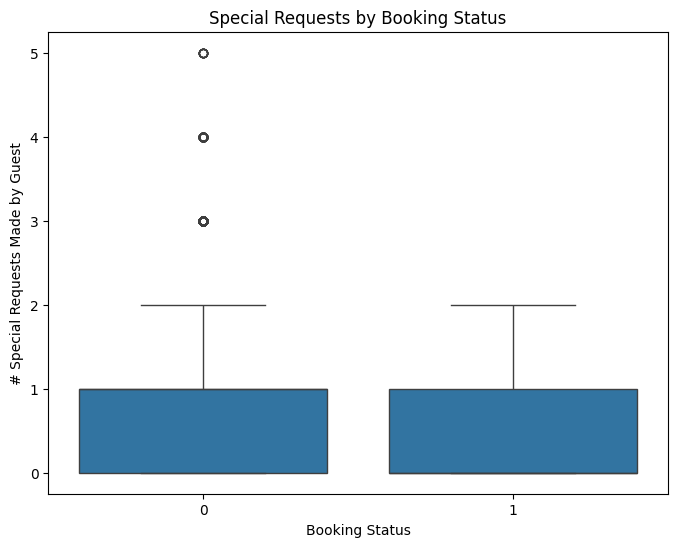

In [61]:
# create box plot for special requests and booking status (correlation coeff = -0.245)
plt.figure(figsize=(8,6))
sns.boxplot(x = 'booking status', y = 'special requests', data = data_clean)

# add title
plt.title('Special Requests by Booking Status')
# add x and y labels
plt.xlabel('Booking Status')
plt.ylabel('# Special Requests Made by Guest')

plt.show()

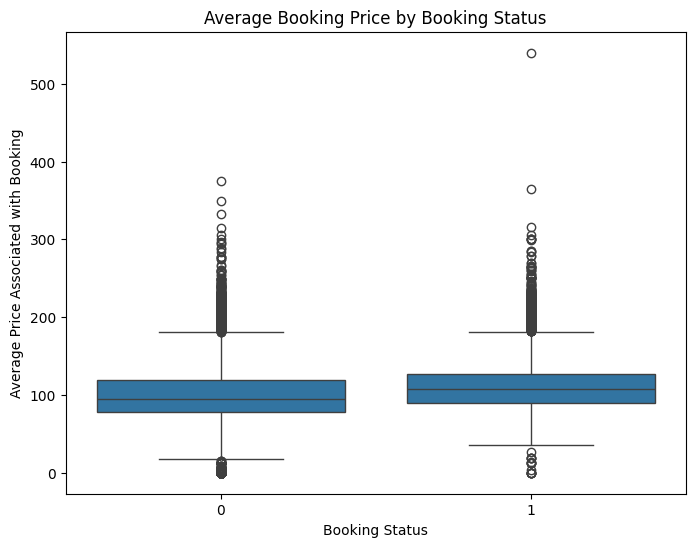

In [62]:
# create box plot for average price and booking status (correlation coeff = -0.245)
plt.figure(figsize=(8,6))
sns.boxplot(x = 'booking status', y = 'average price', data = data_clean)

# add title
plt.title('Average Booking Price by Booking Status')
# add x and y labels
plt.xlabel('Booking Status')
plt.ylabel('Average Price Associated with Booking')

plt.show()

### Split the data into training and testing set (70/30 split)

In [63]:
import math
from sklearn.model_selection import train_test_split
# determine how many samples make up 30$ of the dataset
test_n = len(data_clean) * 0.3
# round the number down
test_n = math.floor(test_n)
# create a dataframe that includes all columns except 'booking status' (so only predictors)
predictors = data_clean.drop(columns=['booking status'])
# create a dataframe that includes only the 'booking status' column
booking_status = data_clean['booking status']
# split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors,
                                                    booking_status,
                                                    test_size = test_n,
                                                    random_state = 0)


Scaled data - Scale all predictors to have mean 0 and variance 1 - Use for models where performance benefits from scaled data

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on X_train and scale the features
scaled_X_train = scaler.fit_transform(X_train)

# Scale X_test using the same scaler
scaled_X_test = scaler.transform(X_test)

# Convert back to DataFrames with the original columns and reset indices
X_train_scaled = pd.DataFrame(scaled_X_train, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaled_X_test, columns=X_test.columns, index=X_test.index)


### Implement baseline models

***Logistic Regression***

Implement function that performs forward stepwise logistic regression

1. Use all predictors

In [65]:
import statsmodels.api as sm
# fit a model using all predictors
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.438185
         Iterations 12


Test the model on the test data

In [66]:
# create design matrix for test set
X_test_all_design = sm.add_constant(X_test)
# get predicted probabilities from the model
predicted_probs_all = model.predict(X_test_all_design)
# convert probabilities to predicted classes
predicted_classes_all = (predicted_probs_all > 0.5).astype(int)

Evaluate the model using accuracy, precision, recall, and F1-score

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test, predicted_classes_all))
# calculate and print precision of model
print("Precision:", precision_score(y_test, predicted_classes_all))
# calculate and print recall of model
print("Recall:", recall_score(y_test, predicted_classes_all))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test, predicted_classes_all))

Accuracy: 0.7939120838697812
Precision: 0.7364657814096016
Recall: 0.5958677685950413
F1 Score: 0.6587482868889905


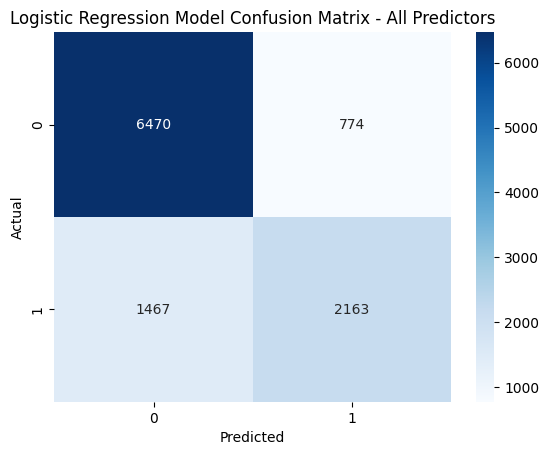

In [68]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test, predicted_classes_all)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Model Confusion Matrix - All Predictors')
plt.show()

2. Use AIC as criterion

In [69]:
# write a function that performs forward stepwise logistic regression using AIC criterion
def forward_stepwise_logit_AIC(X_train, y_train):
  # keep track of predictor variables that are still available to be added to the model
  remaining_predictors = list(X_train.columns)
  # list of selected predictor variables for the model
  selected_predictors = []
  # create variables for criterion that we want to minimize - initially set to infinity
  current_best_aic, new_best_aic = float('inf'), float('inf')

  # loop (at max) until there are no more predictors left to be added
  while remaining_predictors:

    aic_and_predictor = []
    # loop through all predictors that have yet to be added to the model and evaluate adding each one
    for predictor in remaining_predictors:
      # fit a logistic regression model with all previous predictors plus the new one
      model = sm.Logit(y_train, sm.add_constant(X_train[selected_predictors + [predictor]])).fit();
      # get the AIC value that corresponds to the added predictor and add to a list
      aic_and_predictor.append((model.aic, predictor))

    # now for that size model, sort all added predictors by AIC
    aic_and_predictor.sort()
    # get the predictor that has the lowest AIC
    new_best_aic, new_best_predictor = aic_and_predictor[0]

    # if the new best model that we just found improves the AIC, use it
    if new_best_aic < current_best_aic:
      # remove selected predictor from remaining predictors
      remaining_predictors.remove(new_best_predictor)
      # add new best predictor to list of selected variables
      selected_predictors.append(new_best_predictor)
      # update current best aic with new best aic
      current_best_aic = new_best_aic
    # no improvement
    else:
      # stop forward selection - model did not improve
      break

  return selected_predictors

# run forward stepwise selection
selected_predictors = forward_stepwise_logit_AIC(X_train, y_train)
# print selected predictors
print("Selected Predictors:", selected_predictors)
print(len(selected_predictors))

Optimization terminated successfully.
         Current function value: 0.627381
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630285
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629006
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626643
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629436
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626494
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.630575
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.534482
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629606
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621919
  

Fit a logistic regression model with the selected predictors

In [70]:
# fit logistic regression model with the predictors chosen from forward stepwise using AIC
# create design matrix
X_train_design = sm.add_constant(X_train[selected_predictors])
# fit logistic regression model
model = sm.Logit(y_train, X_train_design).fit()

Optimization terminated successfully.
         Current function value: 0.438238
         Iterations 10


Test the model on the test data

In [71]:
# create design matrix for test set
X_test_design = sm.add_constant(X_test[selected_predictors])
# get predicted probabilities from the model
predicted_probs = model.predict(X_test_design)
# convert probabilities to predicted classes
predicted_classes = (predicted_probs > 0.5).astype(int)

Evaluate the model using accuracy, precision, recall, and F1

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test, predicted_classes))
# calculate and print precision of model
print("Precision:", precision_score(y_test, predicted_classes))
# calculate and print recall of model
print("Recall:", recall_score(y_test, predicted_classes))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test, predicted_classes))

Accuracy: 0.7930844215560051
Precision: 0.7351738241308794
Recall: 0.5942148760330579
F1 Score: 0.6572212065813529


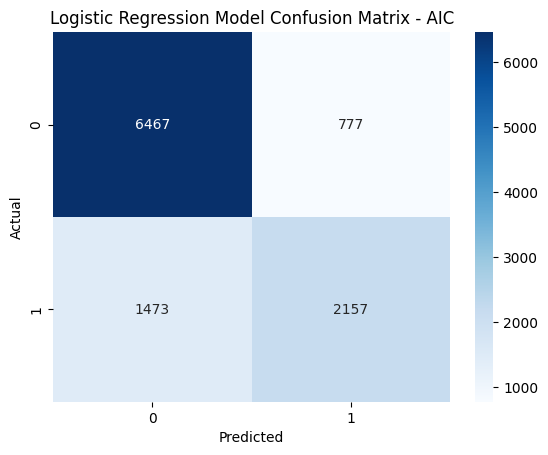

In [73]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test, predicted_classes)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Model Confusion Matrix - AIC')
plt.show()

3. Use BIC as criterion

In [74]:
# write a function that performs forward stepwise logistic regression using BIC criterion
def forward_stepwise_logit_BIC(X_train, y_train):
  # keep track of predictor variables that are still available to be added to the model
  remaining_predictors = list(X_train.columns)
  # list of selected predictor variables for the model
  selected_predictors = []
  # create variables for criterion that we want to minimize - initially set to infinity
  current_best_bic, new_best_bic = float('inf'), float('inf')

  # loop (at max) until there are no more predictors left to be added
  while remaining_predictors:

    bic_and_predictor = []
    # loop through all predictors that have yet to be added to the model and evaluate adding each one
    for predictor in remaining_predictors:
      # fit a logistic regression model with all previous predictors plus the new one
      model = sm.Logit(y_train, sm.add_constant(X_train[selected_predictors + [predictor]])).fit();
      # get the BIC value that corresponds to the added predictor and add to a list
      bic_and_predictor.append((model.bic, predictor))

    # now for that size model, sort all added predictors by BIC
    bic_and_predictor.sort()
    # get the predictor that has the lowest BIC
    new_best_bic, new_best_predictor = bic_and_predictor[0]

    # if the new best model that we just found improves the BIC, use it
    if new_best_bic < current_best_bic:
      # remove selected predictor from remaining predictors
      remaining_predictors.remove(new_best_predictor)
      # add new best predictor to list of selected variables
      selected_predictors.append(new_best_predictor)
      # update current best bic with new best bic
      current_best_bic = new_best_bic
    # no improvement
    else:
      # stop forward selection - model did not improve
      break

  return selected_predictors

# run forward stepwise selection
selected_predictors = forward_stepwise_logit_BIC(X_train, y_train)
# print selected predictors
print("Selected Predictors:", selected_predictors)
print(len(selected_predictors))

Optimization terminated successfully.
         Current function value: 0.627381
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630285
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629006
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626643
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629436
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626494
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.630575
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.534482
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629606
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621919
  

Fit a logistic regression model with the selected

In [75]:
# fit logistic regression model with the predictors chosen from forward stepwise using AIC
# create design matrix
X_train_design = sm.add_constant(X_train[selected_predictors])
# fit logistic regression model
model = sm.Logit(y_train, X_train_design).fit()

Optimization terminated successfully.
         Current function value: 0.438238
         Iterations 10


Test the model on the test data

In [76]:
# create design matrix for test set
X_test_design = sm.add_constant(X_test[selected_predictors])
# get predicted probabilities from the model
predicted_probs = model.predict(X_test_design)
# convert probabilities to predicted classes
predicted_classes = (predicted_probs > 0.5).astype(int)

Evaluate the model using accuracy, precision, recall, and F1-score

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test, predicted_classes))
# calculate and print precision of model
print("Precision:", precision_score(y_test, predicted_classes))
# calculate and print recall of model
print("Recall:", recall_score(y_test, predicted_classes))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test, predicted_classes))

Accuracy: 0.7930844215560051
Precision: 0.7351738241308794
Recall: 0.5942148760330579
F1 Score: 0.6572212065813529


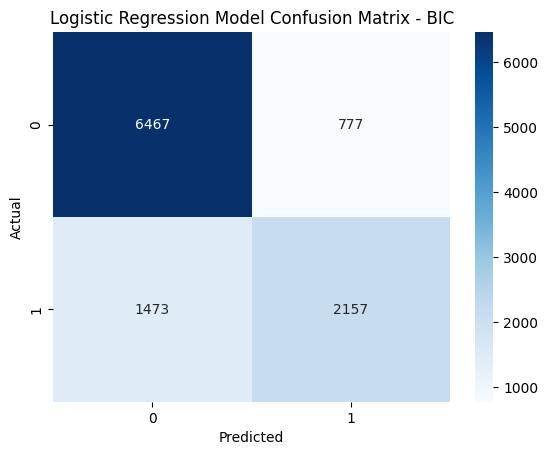

In [78]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test, predicted_classes)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Model Confusion Matrix - BIC')
plt.show()

***Decision Tree***

1. All features

Tune hyperparameters - criterion, max_depth, min_samples_split, min_samples_leaf

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# define a parameter grid that will be used to tune the hyperparameters
param_grid_rt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create an instance of the DecisionTreeClassifier class that will be used to evaluate different hyperparameter combinations
dt_class = DecisionTreeClassifier(random_state=42) # set random_state=42 for reproducibility

# use GridSearchCV to perform the grid search with cross-validation - trains k different models and uses k-1 folds each time as training data and the rest as validation
grid_search_dt = GridSearchCV(estimator=dt_class, param_grid=param_grid_rt, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# fit model on training data
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

Get best estimator, parameters, and score

In [80]:
# get best estimator after grid search
best_dt = grid_search_dt.best_estimator_
# get best parameters after grid search
best_params = grid_search_dt.best_params_
# get best score after grid search
best_score = grid_search_dt.best_score_

# print best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: -0.12997585682635907


Predict on the test data

In [81]:
# predict on the test data
dt_predictions = best_dt.predict(X_test)

Evaluate the model using accuracy, precision, recall, and F1-Score

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test, dt_predictions))
# calculate and print precision of model
print("Precision:", precision_score(y_test, dt_predictions))
# calculate and print recall of model
print("Recall:", recall_score(y_test, dt_predictions))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test, dt_predictions))

Accuracy: 0.8731837410336583
Precision: 0.825383058687482
Recall: 0.7865013774104683
F1 Score: 0.8054732684440683


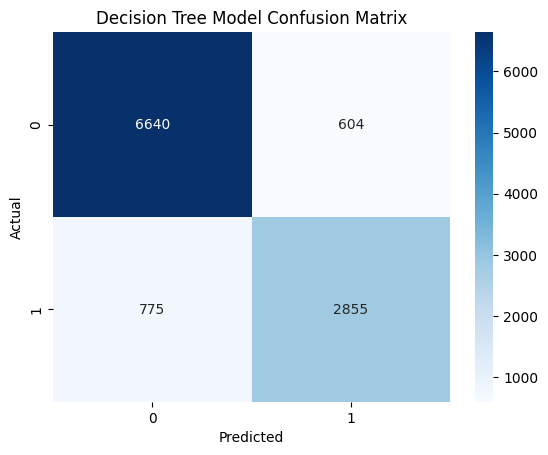

In [83]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test, dt_predictions)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Model Confusion Matrix')
plt.show()

2. Feature Selection

Resplit data to get a validation set

In [84]:
# split into training and test sets
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(predictors,
                                                                     booking_status,
                                                                     test_size=0.3,
                                                                     random_state=0)
# further split test set into validation and test set (so in terms of whole dataset, 15% test and 15% validation)
# want a validation set to ensure that we don't use the test set in choosing the model - would be part of training
X_val_tree, X_test_tree, y_val_tree, y_test_tree = train_test_split(X_test_tree,
                                                                y_test_tree,
                                                                test_size=0.5,
                                                                random_state=0)

print(X_train_tree.shape)
print(X_val_tree.shape)
print(X_test_tree.shape)

(25373, 17)
(5437, 17)
(5438, 17)


In [85]:
from sklearn.model_selection import cross_val_score

# fit basic model without any tuning
dt_class = DecisionTreeClassifier(random_state=42)
dt_class.fit(X_train_tree, y_train_tree)
# get most important features - use already fit model
important_features = dt_class.feature_importances_
# define a range of thresholds to test for best one
thresholds = (0.01, 0.11, 0.01)

# store results of cross validation - trying to find best threshold to use
cv_results = {}

# loop through each threshold and evaluate model with cross-validation
for threshold in thresholds:
  # selected features based on current threshold
  selected_features = X_train.columns[important_features > threshold]
  # extract selected features from training and testing sets
  X_train_selected = X_train_tree[selected_features]
  X_val_selected = X_val_tree[selected_features]

  # perform cross-validation using selected features
  scores = cross_val_score(dt_class, X_train_selected, y_train_tree, cv=5, scoring='f1') # using F1-Score since imblanaced classes

  # store average F1 for the threshold
  cv_results[threshold] = np.mean(scores)

# find best threshold based on average cross validation performance
best_threshold = max(cv_results, key=cv_results.get)

print("Best Threshold:", best_threshold)

Best Threshold: 0.01


Fit model using best threshold

In [86]:
threshold = 0.01
# get selected features based on best threshold
selected_features = X_train_tree.columns[important_features > threshold]

# use only selected features for training and test set
X_train_selected = X_train_tree[selected_features]
X_test_selected = X_test_tree[selected_features]

# look at selected features
selected_features

Index(['number of adults', 'number of weekend nights', 'number of week nights',
       'type of meal', 'lead time', 'market segment type', 'average price',
       'special requests', 'month of reservation', 'day of reservation',
       'year of reservation'],
      dtype='object')

Train model using only selected features

In [87]:
# fit model on selected features
dt_class.fit(X_train_selected, y_train_tree)

DecisionTreeClassifier(random_state=42)

Tune hyperparameters for the selected features

In [88]:
# define a parameter grid that will be used to tune the hyperparameters
param_grid_rt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# use GridSearchCV to perform the grid search with cross-validation - trains k different models and uses k-1 folds each time as training data and the rest as validation
grid_search_dt = GridSearchCV(estimator=dt_class, param_grid=param_grid_rt, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# fit model on training data
grid_search_dt.fit(X_train_selected, y_train_tree)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

Get best estimators, parameters, and score

In [89]:
# get best estimator after grid search
best_dt_selected = grid_search_dt.best_estimator_
# get best parameters after grid search
best_params_selected = grid_search_dt.best_params_
# get best score after grid search
best_score_selected = grid_search_dt.best_score_

# print best parameters and best score
print("Best Parameters:", best_params_selected)
print("Best Score:", best_score_selected)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: -0.12978369005710558


Predict on the test data

In [90]:
# predict on the test data
dt_predictions_selected = dt_class.predict(X_test_selected)

Evaluate the selected features model using accuracy, precision, recall, F1-Score

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test_tree, dt_predictions_selected))
# calculate and print precision of model
print("Precision:", precision_score(y_test_tree, dt_predictions_selected))
# calculate and print recall of model
print("Recall:", recall_score(y_test_tree, dt_predictions_selected))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test_tree, dt_predictions_selected))

Accuracy: 0.8628172122103714
Precision: 0.7884199134199135
Recall: 0.8040838852097131
F1 Score: 0.7961748633879782


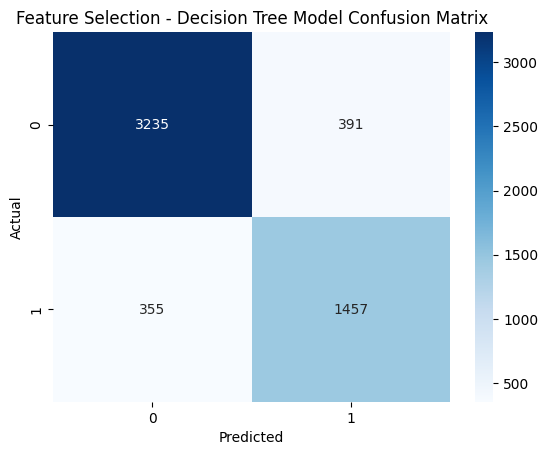

In [92]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test_tree, dt_predictions_selected)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Feature Selection - Decision Tree Model Confusion Matrix')
plt.show()

***Random Forest***

1. All Features

Tune hyperparameters - n_estimators, max_features, max_depth, max_leaf_nodes, max_sample, min_sample_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define a parameter grid that will be used to tune the hyperparameters
param_grid_rf = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 20, 30, None],
    'max_leaf_nodes': [3, 6, 9, None]
}

# create an instance of the RandomForestClassifier() that will be used to evaluate different hyperparameter combinations
rf_class = RandomForestClassifier(random_state=42) # set random_state for reproducibility

# use GridSearchCV to perform the grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_class, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# fit model on training data
grid_search_rf.fit(X_train, y_train)

# get best estimator after grid search
best_rf = grid_search_rf.best_estimator_
# print best estimator
print(best_rf)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Fit model with chosen hyperparameters

In [ ]:
best_rf_model = RandomForestClassifier(n_estimators=150)
# fit best model on the training data
best_rf_model.fit(X_train, y_train)


Predict on the test data

In [ ]:
# make predictions on our test data
rf_predictions = best_rf_model.predict(X_test)

Evaluate model using accuracy, precision, recall, and F1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test, rf_predictions))
# calculate and print precision of model
print("Precision:", precision_score(y_test, rf_predictions))
# calculate and print recall of model
print("Recall:", recall_score(y_test, rf_predictions))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test, rf_predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test, rf_predictions)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Model Confusion Matrix')
plt.show()

2. Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# fit basic model without any tuning
rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train_tree, y_train_tree)
# get most important features - use already fit model
important_features = rf_class.feature_importances_
# define a range of thresholds to test for best one
thresholds = (0.01, 0.11, 0.01)

# store results of cross validation - trying to find best threshold to use
cv_results = {}

# loop through each threshold and evaluate model with cross-validation
for threshold in thresholds:
  # selected features based on current threshold
  selected_features = X_train.columns[important_features > threshold]
  # extract selected features from training and testing sets
  X_train_selected = X_train_tree[selected_features]
  X_val_selected = X_val_tree[selected_features]

  # perform cross-validation using selected features
  scores = cross_val_score(rf_class, X_train_selected, y_train_tree, cv=5, scoring='f1') # using F1-Score since imblanaced classes

  # store average F1 for the threshold
  cv_results[threshold] = np.mean(scores)

# find best threshold based on average cross validation performance
best_threshold = max(cv_results, key=cv_results.get)

print("Best Threshold:", best_threshold)

Select features based on best threshold

In [ ]:
threshold = 0.01
# get selected features based on best threshold
selected_features = X_train_tree.columns[important_features > threshold]

# use only selected features for training and test set
X_train_selected = X_train_tree[selected_features]
X_test_selected = X_test_tree[selected_features]

# look at selected features
selected_features

Fit model on selected features

In [ ]:
# fit model on selected features
rf_class.fit(X_train_selected, y_train_tree)

Tune hyperparameters for the selected features

In [ ]:
# define a parameter grid that will be used to tune the hyperparameters
param_grid_rf = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 20, 30, None],
    'max_leaf_nodes': [3, 6, 9, None]
    #'max_samples': [0.5, 0.7, 0.8, 1.0],
    #'min_samples_split': [2, 5, 10, 20, 50, 100]
}

# use GridSearchCV to perform the grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_class, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# fit model on training data
grid_search_rf.fit(X_train_selected, y_train_tree)

# get best estimator after grid search
best_rf = grid_search_rf.best_estimator_
# print best estimator
print(best_rf)

Predict on the test data

In [ ]:
# make predictions on our test data
rf_predictions = best_rf.predict(X_test_selected)

Evaluate model using accuracy, precision, recall, and F1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test_tree, rf_predictions))
# calculate and print precision of model
print("Precision:", precision_score(y_test_tree, rf_predictions))
# calculate and print recall of model
print("Recall:", recall_score(y_test_tree, rf_predictions))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test_tree, rf_predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test_tree, rf_predictions)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Feature Selection - Random Forest Model Confusion Matrix')
plt.show()

### Implement additional (non-baseline) models

1. K-Nearest Neighbors

a. All Features

Tune hyperparameters - n_neighbors, weights, metric

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# create instance of KNeighborsClassifier
knn_class = KNeighborsClassifier()
# define parameter grid that will be used to tune hyperparameters
param_grid_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# use GridSearchCV to perform the grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_class, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# fit model on training data
grid_search_knn.fit(X_train_scaled, y_train)

# get best estimator after grid search
best_knn = grid_search_knn.best_estimator_
# print best estimator
print(best_knn)

Get best estimator, parameters, and score

In [ ]:
# get best estimator after grid search
best_knn = grid_search_knn.best_estimator_
# get best parameters after grid search
best_params_knn = grid_search_knn.best_params_
# get best score after grid search
best_score_knn = grid_search_knn.best_score_

# print best parameters and best score
print("Best Parameters:", best_params_knn)
print("Best Score:", best_score_knn)

Predict on test data

In [ ]:
# make predictions on our test data
knn_predictions = best_knn.predict(X_test_scaled)

Evaluate performance of model on test data using accuracy, precision, recall, and F1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test, knn_predictions))
# calculate and print precision of model
print("Precision:", precision_score(y_test, knn_predictions))
# calculate and print recall of model
print("Recall:", recall_score(y_test, knn_predictions))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test, knn_predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test, knn_predictions)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Model Confusion Matrix')
plt.show()

b. Feature Selection

Resplit code to have validation set for feature selection

In [ ]:
# split into training and test sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(predictors,
                                                                     booking_status,
                                                                     test_size=0.3,
                                                                     random_state=0)
# further split test set into validation and test set (so in terms of whole dataset, 15% test and 15% validation)
# want a validation set to ensure that we don't use the test set in choosing the model - would be part of training
X_val_knn, X_test_knn, y_val_knn, y_test_knn = train_test_split(X_test_knn,
                                                                y_test_knn,
                                                                test_size=0.5,
                                                                random_state=0)

Rescale data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on X_train and scale the features
scaled_X_train = scaler.fit_transform(X_train_knn)

# Scale X_test using the same scaler
scaled_X_test = scaler.transform(X_test_knn)

# Scale X_val using the same scaler
scaled_X_val = scaler.transform(X_val_knn)

# Convert back to DataFrames with the original columns and reset indices
X_train_scaled = pd.DataFrame(scaled_X_train, columns=X_train_knn.columns, index=X_train_knn.index)
X_test_scaled = pd.DataFrame(scaled_X_test, columns=X_test_knn.columns, index=X_test_knn.index)
X_val_scaled = pd.DataFrame(scaled_X_val, columns=X_val_knn.columns, index=X_val_knn.index)

Feature selection - choose which predictors to use

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# define variables that will keep track of the best model so far, the k-value (number of predictors), and it's accuracy/performance
best_k = None
best_accuracy = 0
best_model_knn = None
best_X_train_selected = None
best_X_test_selected = None

# loop through all possible number of predictors (1-17)
for k in range(1, 17):
  # create an instance of SelectKBest
  selector = SelectKBest(chi2, k=k) # use chi-square as statistical test used for feature selection
  # apply the selector to the training data
  X_train_selected = selector.fit_transform(X_train_scaled, y_train_knn)
  # apply the same feature selection to the validation data
  X_val_selected = selector.transform(X_val_scaled)
  X_test_selected = selector.transform(X_test_scaled)

  # define an instance of the KNearestNeighbors classifier
  model = KNeighborsClassifier()
  # fit the model on the selected training data
  model.fit(X_train_selected, y_train_knn)

  # predict on the validation set
  knn_predictions = model.predict(X_val_selected)

  # compute the accuracy of the model on the validation set
  current_accuracy = accuracy_score(y_val_knn, knn_predictions)

  # check if the new accuracy is better than the best saved
  if current_accuracy > best_accuracy:
    # update the best accuracy to be the current accuracy
    best_accuracy = current_accuracy
    # update the best k value - number of predictors
    best_k = k
    # update the best KNN model
    best_model_knn = model
    # update the best predictors
    best_X_train_selected = X_train_selected
    best_X_test_selected = X_test_selected

# print out number of features used
print("Number of Features (k)", best_k)
best_model_knn

Tune hyperparameters

In [ ]:
# define parameter grid that will be used to tune hyperparameters
param_grid_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# use GridSearchCV to perform the grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=best_model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# fit model on training data
grid_search_knn.fit(best_X_train_selected, y_train_knn)

# get best estimator after grid search
best_model_knn = grid_search_knn.best_estimator_
# print best estimator
print(best_model_knn)

Get best estimator, parameters, and score

In [ ]:
# get best parameters after grid search
best_params_knn = grid_search_knn.best_params_
# get best score after grid search
best_score_knn = grid_search_knn.best_score_

# print best parameters and best score
print("Best Parameters:", best_params_knn)
print("Best Score:", best_score_knn)

Predict on test data

In [ ]:
# make predictions on our test data
knn_predictions = best_model_knn.predict(best_X_test_selected)

Evaluate performance of model using accuracy, precision, recall, and F1-Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test_knn, knn_predictions))
# calculate and print precision of model
print("Precision:", precision_score(y_test_knn, knn_predictions))
# calculate and print recall of model
print("Recall:", recall_score(y_test_knn, knn_predictions))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test_knn, knn_predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test_knn, knn_predictions)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Feature Selection - KNN Model Confusion Matrix')
plt.show()

2. Naive Bayes

1. All Features

In [ ]:
from sklearn.naive_bayes import GaussianNB
# define an instance of the model
model = GaussianNB()
# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test set
gnb_predictions = model.predict(X_test)

Evaluate performance of model using accuracy, precision, recall, F1-Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
# calculate and print precision of model
print("Precision:", precision_score(y_test, gnb_predictions))
# calculate and print recall of model
print("Recall:", recall_score(y_test, gnb_predictions))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test, gnb_predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test, gnb_predictions)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gaussian Naive Bayes Model Confusion Matrix')
plt.show()

2. Feature Selection

Resplit data into training, validation, and test set

In [ ]:
# split into training and test sets
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(predictors,
                                                                     booking_status,
                                                                     test_size=0.3,
                                                                     random_state=0)
# further split test set into validation and test set (so in terms of whole dataset, 15% test and 15% validation)
# want a validation set to ensure that we don't use the test set in choosing the model - would be part of training
X_val_gnb, X_test_gnb, y_val_gnb, y_test_gnb = train_test_split(X_test_gnb,
                                                                y_test_gnb,
                                                                test_size=0.5,
                                                                random_state=0)

Feature selection - choose predictors to use

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# define variables that will keep track of the best model so far, the k-value (number of predictors), and it's accuracy/performance
best_k = None
best_accuracy = 0
best_model_gnb = None
best_X_train_selected = None
best_X_test_selected = None

# loop through all possible number of predictors (1-17)
for k in range(1, 17):
  # create an instance of SelectKBest
  selector = SelectKBest(chi2, k=k) # use chi-square as statistical test used for feature selection
  # apply the selector to the training data
  X_train_selected = selector.fit_transform(X_train_gnb, y_train_gnb)
  # apply the same feature selection to the validation data
  X_val_selected = selector.transform(X_val_gnb)
  X_test_selected = selector.transform(X_test_gnb)

  # define an instance of the Gaussian Naive Bayes classifier
  model = GaussianNB()
  # fit the model on the selected training data
  model.fit(X_train_selected, y_train_gnb)

  # predict on the validation set
  gnb_predictions = model.predict(X_val_selected)

  # compute the accuracy of the model on the validation set
  current_accuracy = accuracy_score(y_val_gnb, gnb_predictions)

  # check if the new accuracy is better than the best saved
  if current_accuracy > best_accuracy:
    # update the best accuracy to be the current accuracy
    best_accuracy = current_accuracy
    # update the best k value - number of predictors
    best_k = k
    # update the best NB model
    best_model_gnb = model
    # update the best predictors
    best_X_train_selected = X_train_selected
    best_X_test_selected = X_test_selected

# print out number of features used
print("Number of Features (k)", best_k)
best_model_gnb

Predict on the test set

In [ ]:
gnb_predictions = best_model_gnb.predict(best_X_test_selected)

Evaluate performance of model using accuracy, precision, recall, and F1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate and print accuracy of model
print("Accuracy:", accuracy_score(y_test_gnb, gnb_predictions))
# calculate and print precision of model
print("Precision:", precision_score(y_test_gnb, gnb_predictions))
# calculate and print recall of model
print("Recall:", recall_score(y_test_gnb, gnb_predictions))
# calculate and print f1_score of model
print("F1 Score:", f1_score(y_test_gnb, gnb_predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
# create confusion matrix of results
cm = confusion_matrix(y_test_gnb, gnb_predictions)
# create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Feature Selection - Gaussian Naive Bayes Model Confusion Matrix')
plt.show()